---
title: 'Лабораторна робота 4. OpenCV. Просторові методи обробки зображень. Робота з околом. Просторова фільтрація зображення (short version)'
description:
   Документ зроблено за допомогою [Quarto](https://quarto.org/)
author: Гарагуля Денис
date: "10.31.2024"
lang: ukr
format:
  html:
    code-fold: true
    toc: true # меню
    toc_float: # спливаюче меню  
      collapsed: true # авто
      number_sections: true
jupyter: python3
---

__Мета:__ _знайомство з просторовими методами фільтрації зображень засобами OpenCV у середовищі Anaconda із застосуванням Jupyter Notebook засобами мови програмування Python._

#### Що ви будете вміти?
* Реалізувати методи просторової лінійної фільтрації
* Виконувати побудову наступних згладжуючих фільтрів:
  * низькочастотний фільтр лінійний фільтр на основі простого середнього ковзного (Normalized Box Filter)
  * низькочастотний фільтр з ядром Гауса (Gaussian Filter)
  * медіанний фільтр
  * двосторонній фільтр (Bilateral Filter)

## Короткі теоретичні відомості

### Концепція просторової фільтрації

__Просторовий лінійний фільтр__ задається лінійної згорткою

$$
g(i, j) = \sum_{k, l} f(i + k, j + l) h(k, l),
$$

де $f(i, j)$ -- вхідне зображення; $g(i, j)$ -- вихідне зображення; $h(k, l)$ -- матриця коуфіцієнтів фільтра, яка називається _ядром_.  

Фільтр повністю задається своїми кофіцієнтами. 


Наведемо деякі приклади.

In [1]:
# Імпортуємо пакети
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import sys

# print(f'version cv2: {cv.__version__}')
print('version cv2: %s' % cv.__version__)

version cv2: 4.10.0


In [2]:
# імпортуємо RGB-зображення
image = cv.imread('orig_images/rose.png')
print(f'image shape/dimentions: {image.shape}')
print(f'image number of pixel: {image.size}')

# розділяємо зображення на канали
red, green, blue = cv.split(image)
# формуємо напівтонове зображення
image_gray = cv.imread('orig_images/rose.png', 0)

print(f'grey image shape/scale: {image_gray.shape}')
print(f'grey image number of pixel: {image_gray.size}')

# візуалізуємо зображення
cv.imshow('color image', image)
cv.waitKey(0)
cv.destroyAllWindows()

image shape/dimentions: (1180, 786, 3)
image number of pixel: 2782440
grey image shape/scale: (1180, 786)
grey image number of pixel: 927480


### [Просте середє ковзне (Normalized Box Filter)](https://docs.opencv.org/4.x/dc/dd3/tutorial_gausian_median_blur_bilateral_filter.html)



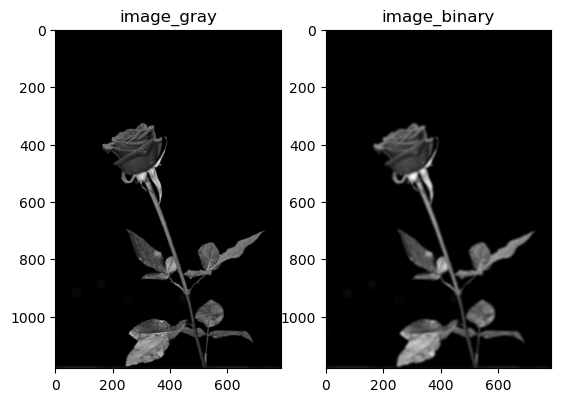

In [3]:
# Візуалізація за допомогою matplotlib
# plt.imread('rose.png')
plt.gray()
# plt.subplot(111)
# plt.imshow(image_gray)
# plt.title('Gray Image')
# plt.show()
# plt.savefig('Gray_image.png')


# Реалізація низькочастотно фільтра на основі простого середнього ковзного з параметрами вікна 10 х 10 
dst = cv.blur(image_gray, (10, 10))

# Побудова і вивід зображення у файл
plt.subplot(121)
plt.imshow(image_gray)
plt.title('image_gray')
plt.subplot(122)
plt.imshow(dst)
plt.title('image_binary')
# plt.savefig('image_binary.png')
plt.show()

__Завдання для самостійної роботи__.
  * Реалізувати фільтр на основі ядра Гауса
  * Написати процедуру, яка б зашумлювала нормальним шумом з параметрами $(n, \mu, \sigma)$ зображення
  * Взявши за основу власний портрет, зашумити його нормальним шумом
  * Реалізувати медіанний фільтр і продемонструвати послідовно роботу медіанного і гаусового фільтру, оптимально підібравши і обґрунтувавши значення параметрів
  * Реалізувати двосторонній фільтр
  * Написати процедуру, до складу якої б входили всі низькочастотні фільтри, які досліджуються в цій лабораторній роботі, а вибір потрібного задавався відповідним вхідним параметром.
  

### 1. [Фільтр з ядром Гауса](https://docs.opencv.org/4.x/dc/dd3/tutorial_gausian_median_blur_bilateral_filter.html)

* ## $$G_0(x,y)=Ae^{\frac{-(x-\mu_x)^2}{2\sigma_x^2}+\frac{-(y-\mu_y)^2}{2\sigma_y^2}}$$

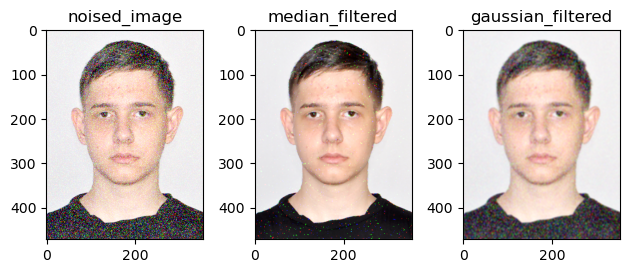

In [4]:
# Візуалізація за допомогою matplotlib
def add_gaussian_noise(image, mean=0, std=1):
    noise = np.random.normal(mean, std, image.shape).astype(np.uint8)
    noisy_image = cv.add(image, noise)
    return noisy_image

image = cv.imread('orig_images/i_image.jpg')
noised_image = add_gaussian_noise(image)
dst_Median = cv.medianBlur(noised_image, 3)
dst_Gauss = cv.GaussianBlur(noised_image, (5, 5), 2)

# Побудова і вивід зображення у файл
plt.subplot(131)
plt.imshow(cv.cvtColor(noised_image, cv.COLOR_BGR2RGB))
plt.title('noised_image')
plt.subplot(132)
plt.imshow(cv.cvtColor(dst_Median, cv.COLOR_BGR2RGB))
plt.title('median_filtered')
plt.subplot(133)
plt.imshow(cv.cvtColor(dst_Gauss, cv.COLOR_BGR2RGB))
plt.title('gaussian_filtered')
plt.tight_layout()
plt.show()

### 2. [Двосторонній фільтр](https://docs.opencv.org/4.x/dc/dd3/tutorial_gausian_median_blur_bilateral_filter.html) 

$$I^{filtered}(x)=\frac{1}{W_p}\sum\limits_{x_i\in\Omega}I(x_i)f_r(||I(x_i)-I(x)||)g_s(||x_i-x||)$$
де $W_p$ це:
$$W_p=\sum\limits_{x_i\in\Omega}f_r(||I(x_i)-I(x)||)g_s(||x_i-x||)$$
* $I^{filtered}$ це відфільтроване зображення
* $I$ оригінальне зображення
* $x$ координати поточного пікселя
* $\Omega$ вікно відцентроване у $x$, тому $x_i\in\Omega$ це інший піксель
* $f_r$ це діапазон ядра для згладжування різниць в інтенсивностях 
* $g_s$ є просторовим ядром для згладжування різниць у координатах 

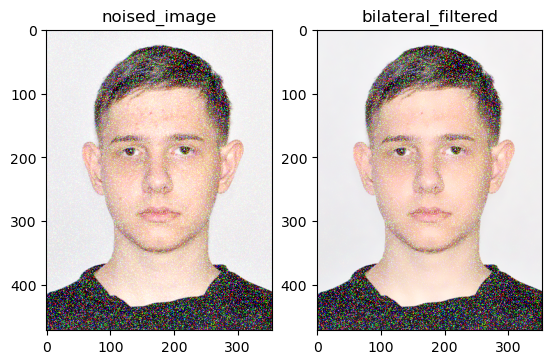

In [5]:
# Реалізація низькочастотно фільтра на основі простого середнього ковзного з параметрами вікна 10 х 10 
i = 15
dst_bilateraled = cv.bilateralFilter(noised_image, i, i * 2, i / 2)

# Побудова і вивід зображення у файл
plt.subplot(121)
plt.imshow(cv.cvtColor(noised_image, cv.COLOR_BGR2RGB))
plt.title('noised_image')
plt.subplot(122)
plt.imshow(cv.cvtColor(dst_bilateraled, cv.COLOR_BGR2RGB))
plt.title('bilateral_filtered')
plt.show()

 Яким методом відфільтрувати?
 1. Просте середє ковзне
 2. Медіана
 3. Гауссом
 4. Двостороннім
 Введіть число >>  3


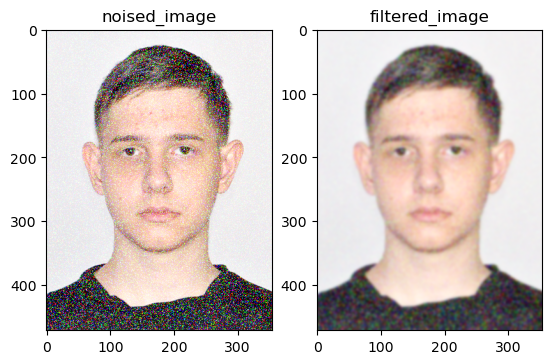

In [6]:
case = int(input(" Яким методом відфільтрувати?\n 1. Просте середє ковзне\n 2. Медіана\n 3. Гауссом\n 4. Двостороннім\n Введіть число >> "))
if case not in range(1, 5):
    print("Ви ввели неправильний переметр. Перезапустіть і спробуйте ще раз")
else:
    match case:
        case 1:
            dst = cv.blur(image_gray, (10, 10))
        case 2:
            dst = cv.medianBlur(noised_image, 3)
        case 3:
            dst = cv.GaussianBlur(noised_image, (17, 17), 2)
        case 4:
            i = 15
            dst = cv.bilateralFilter(noised_image, i, i * 2, i / 2)
    
    plt.subplot(121)
    plt.imshow(cv.cvtColor(noised_image, cv.COLOR_BGR2RGB))
    plt.title('noised_image')
    plt.subplot(122)
    plt.imshow(cv.cvtColor(dst, cv.COLOR_BGR2RGB))
    plt.title('filtered_image')
    plt.show()

### Завдання на лабораторну роботу

1. Створити Notebook-документ `<lab_1_StudentLastName>` за допомогою Jupyter Notebook. (Див. [тут](https://devpractice.ru/python-lesson-1-install/), [тут](https://devpractice.ru/python-lesson-6-work-in-jupyter-notebook/) і [тут](https://jupyter-notebook.readthedocs.io/en/stable/notebook.html)).

1. Відобразити в робочому документі ("зошиті" ipython) виконання пунктів 1-2 наведених вище, скориставшись інтерактивними посиланнями на відповідну документацію. Та виконати __Завдання для самостійної роботи__ __В якості зображення використати власний портрет, отриманий за допомогою цифрової камери__

1. Робочий документ оформити у вигляді Notebook-документу (файл __.ipynb__).

1. Дати відповіді на контрольні запитання.

1. Скомпілювати звіт у форматі __.html__. Для цього необхідно завантажити термінал і у командному рядку запустити наступну команду:

`jupyter nbconvert lab_1_StudentLastName.ipynb --to html`

10. Представити звіт у вигляді архіву. Проект має складатися мінімум з двох файлів: `lab_1_StudentLastName.ipynb` та `lab_1_StudentLastName.html`

## Контрольні запитання

1. У чому полягає сенс градаційних перетворень?
    * Градаційні перетворення — це процеси, які змінюють яскравість і контраст зображення. Вони використовуються в обробці зображень для підвищення видимості деталей.
1. На чому ґрунтуються гістограмні методи?
    * Гістограмні методи ґрунтуються на аналізі та обробці яскравості та розподілу яскравостей пікселів у зображені

### References

1. Anaconda (Python distribution). https://uk.wikipedia.org/wiki/Anaconda_(Python_distribution)
2. Conda. https://conda.io/en/latest/
3. Histograms. https://docs.opencv.org/master/d6/dc7/group__imgproc__hist.html#ga6ca1876785483836f72a77ced8ea759a
4. Smoothing Images. https://docs.opencv.org/4.x/dc/dd3/tutorial_gausian_median_blur_bilateral_filter.html
5. Image Processing (imgproc module). https://docs.opencv.org/master/d7/da8/tutorial_table_of_content_imgproc.html
6. Computer Vision: Algorithms and Applications, 2nd ed. http://szeliski.org/Book/